<h3><b>"An extremely rough and super-simplified visualization code example regarding SVM basic principles" by using centroids</b></h3>
<b>Note 1:</b> This approach would only work with highly separated classification groups in the data.<br />
<b>Note 2:</b> This code also a bit buggy, sometimes the support vectors are recognized incorrectly.<br />

Also, the actual SVM mathematics are way more advanced than this example.
<br /><br/>
With a more real-life -kind of data, this would probably not be even close to an optimal solution.<br /><br />
<b>This is why the actual SVM-algorithm uses iterations to find the optimal hyperplane eventually.</b><br /><br />
<b>These links might give a better idea what actually happens "under the hood":</b>
<ul>
<li><a href="https://www.youtube.com/watch?v=gUzEN2TxnxE">https://www.youtube.com/watch?v=gUzEN2TxnxE</a></li>
<li><a href="https://www.youtube.com/watch?v=Q_A6Is-DY50">https://www.youtube.com/watch?v=Q_A6Is-DY50</a></li>
<li><a href="https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/">https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/</a></li>
<li><a href="https://www.youtube.com/watch?v=1NxnPkZM9bc">https://www.youtube.com/watch?v=1NxnPkZM9bc</a></li>
<li><a href="https://www.youtube.com/watch?v=5zRmhOUjjGY">https://www.youtube.com/watch?v=5zRmhOUjjGY</a></li>


</ul>

### Remember: this example does not follow the actual SVM algorithm implementation, it only visualizes the core principles that eventually happen once the SVM algorithm has been run!

##### Footnote: Most of this code has been modified from ChatGPT examples

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# helper functions

# helper function to find the closest point based on centroids
def find_support_vectors(X, y, direction):
    support_vectors = []

    # for each group in the data
    for value in np.unique(y):
        # filter only this group's data
        group_points = X[y == value]

        # calculate distances and get closest point
        distances = np.abs(np.dot(group_points, direction))
        closest_point_idx = np.argmin(distances)
        support_vectors.append(group_points[closest_point_idx])

    return np.array(support_vectors)

<b>Phase 1: Generate data groups and plot them</b>

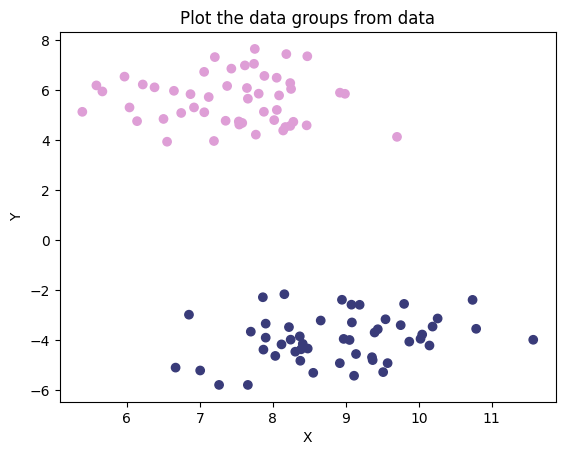

In [3]:
# data generation, centroid and support vector calculations + first plot

# Generate two well-separated clusters of data points
# experiment with the random state in order to find cases
# where the hyperplane is not optimal
# you can alternate with the random_state in order to get different clusters
X, y = make_blobs(n_samples=100, centers=2, random_state=179)

# Calculate centroids of the two groups
centroid_1 = np.mean(X[y == 0], axis=0)
centroid_2 = np.mean(X[y == 1], axis=0)

# Calculate the direction of the hyperplane (perpendicular to the line connecting the centroids)

# this is the part in this code which is a "shortcut/assumption" when comparing to actual SVM
# this code assumes the main slope of the hyperplane
# can be calculated based on how the centroids are positioned 
# against each other (this is however, almost never the true case)
direction = centroid_2 - centroid_1
slope = -direction[0] / direction[1]

# Find the support vectors
support_vectors = find_support_vectors(X, y, direction)

# Plot the original data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot the data groups from data')
plt.show()

<b>Phase 2: Add centroids to each group</b><br />

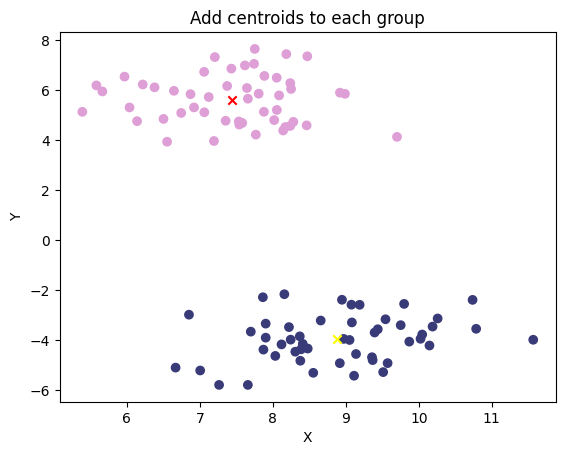

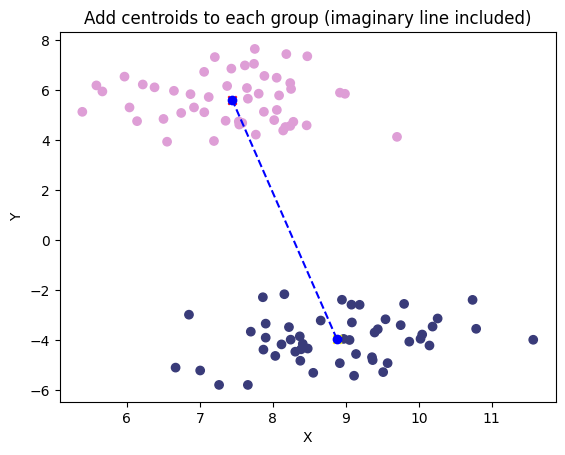

In [4]:
# code to plot the next plot

# Plot centroids
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.scatter(centroid_1[0], centroid_1[1], marker='x', color='yellow')
plt.scatter(centroid_2[0], centroid_2[1], marker='x', color='red')

# helper imaginary line
x_values = [centroid_1[0], centroid_2[0]]
y_values = [centroid_1[1], centroid_2[1]]

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Add centroids to each group')
plt.show()

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Add centroids to each group (imaginary line included)')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.scatter(centroid_1[0], centroid_1[1], marker='x', color='yellow')
plt.scatter(centroid_2[0], centroid_2[1], marker='x', color='red')

plt.show()

<b>Phase 3: Calculate support vectors for each group</b><br />
See the straight line above between the centroid points. The support vector points are the closest points from each group towards the center of that line.

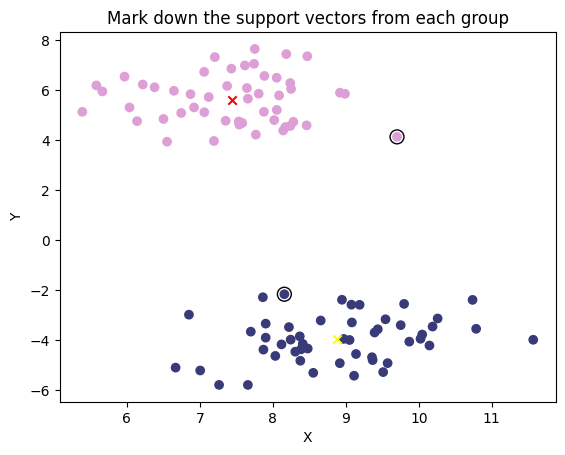

In [5]:
# code to plot the next plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.scatter(centroid_1[0], centroid_1[1], marker='x', color='yellow')
plt.scatter(centroid_2[0], centroid_2[1], marker='x', color='red')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mark down the support vectors from each group')
plt.show()

<b>Phase 4: Draw the main hyperplane line between the support vectors</b><br />
The support vector lines are formed so, that each group is separated with the lines.

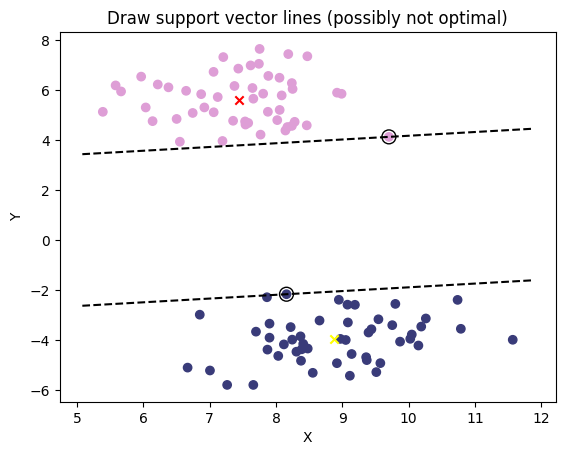

In [6]:
# code to plot the next plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.scatter(centroid_1[0], centroid_1[1], marker='x', color='yellow')
plt.scatter(centroid_2[0], centroid_2[1], marker='x', color='red')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the hyperplane line passing through the first support vector
first_support_vector = support_vectors[0]

# by using the line formula y = mx + b
intercept_hyperplane_1 = first_support_vector[1] - slope * first_support_vector[0]
x_min, x_max = plt.xlim()
y_hyperplane_1 = slope * np.linspace(x_min, x_max, 10) + intercept_hyperplane_1
plt.plot(np.linspace(x_min, x_max, 10), y_hyperplane_1, 'k--')

# Plot the hyperplane line passing through the second support vector
second_support_vector = support_vectors[1]
intercept_hyperplane_2 = second_support_vector[1] - slope * second_support_vector[0]
y_hyperplane_2 = slope * np.linspace(x_min, x_max, 10) + intercept_hyperplane_2
plt.plot(np.linspace(x_min, x_max, 10), y_hyperplane_2, 'k--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Draw support vector lines (possibly not optimal)')
plt.show()

<b>Phase 5: Draw the main hyperplane line</b><br />
The main hyperplane is drawn into the middle of the support vector lines.

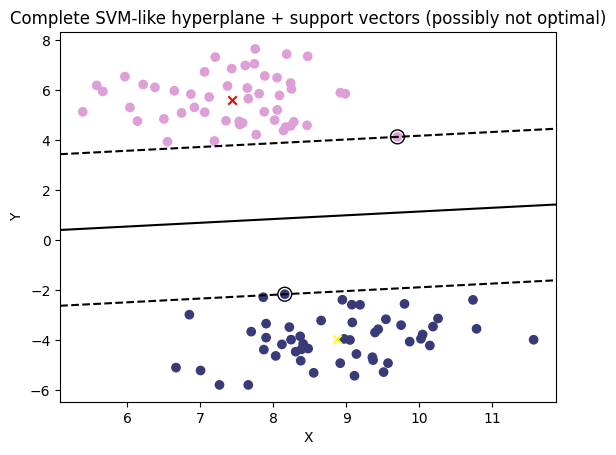

In [7]:
# code to plot the next plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b)
plt.scatter(centroid_1[0], centroid_1[1], marker='x', color='yellow')
plt.scatter(centroid_2[0], centroid_2[1], marker='x', color='red')

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the hyperplane line passing through the first support vector
plt.plot(np.linspace(x_min, x_max, 10), y_hyperplane_1, 'k--')

# Plot the hyperplane line passing through the second support vector
plt.plot(np.linspace(x_min, x_max, 10), y_hyperplane_2, 'k--')

# Plot the hyperplane passing through the middle of the two hyperplanes
intercept_middle_hyperplane = (intercept_hyperplane_1 + intercept_hyperplane_2) / 2
y_middle_hyperplane = slope * np.linspace(x_min, x_max, 10) + intercept_middle_hyperplane
plt.plot(np.linspace(x_min, x_max, 10), y_middle_hyperplane, 'k-')

plt.xlim(x_min, x_max)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Complete SVM-like hyperplane + support vectors (possibly not optimal)')
plt.show()

The actual SVM-algorithm will try many different hyperplane candidates in order to find a version where the hyperplane's margins are MAXIMIZED => better prediction performance on edge cases.